In [22]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [23]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/MFpaper/' 
path_cons = '/home/jvalenti/MOAD/results/Graham/' 

paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [24]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

In [25]:
def interpolate_to_grid(lat, lon, mask=mask):
    """
    Interpolate latitude and longitude to fractional grid coordinates in an irregular grid.

    Parameters:
        lat (float): Latitude of the point.
        lon (float): Longitude of the point.
        grid_lat (xarray.DataArray): Latitude values of the grid.
        grid_lon (xarray.DataArray): Longitude values of the grid.

    Returns:
        tuple: (x_grid, y_grid) as fractional grid coordinates.
    """
    grid_lat = mask.nav_lat
    grid_lon = mask.nav_lon
    distance = ((grid_lat - lat)**2 + (grid_lon - lon)**2)**0.5
    idx_min = distance.argmin()
    y_index, x_index = divmod(idx_min.values, grid_lon.shape[1])

    # Calculate fractional offsets (delta lat/lon to grid spacing)
    try: x_offset = (lon - grid_lon[y_index, x_index]) / (grid_lon[y_index, x_index + 1] - grid_lon[y_index, x_index])
    except IndexError:
        x_offset = (lon - grid_lon[y_index, x_index]) / (grid_lon[y_index, x_index - 1] - grid_lon[y_index, x_index])
    try:y_offset = (lat - grid_lat[y_index, x_index]) / (grid_lat[y_index + 1, x_index] - grid_lat[y_index, x_index])
    except IndexError:
        y_offset = (lat - grid_lat[y_index, x_index]) / (grid_lat[y_index - 1, x_index] - grid_lat[y_index, x_index])
    return float(x_index + x_offset), float(y_index + y_offset)

In [26]:
def finder2(target_lat, target_lon,mask=mask):
# Load grid data (e.g., from a NetCDF file)
    lat = mask.nav_lat
    lon = mask.nav_lon

    #find closest grid
    distance = ((lat - target_lat)**2 + (lon - target_lon)**2)**0.5
    nearest_index = distance.argmin()
    return int(nearest_index // lon.shape[1]), int(nearest_index % lon.shape[1])
     

Text(0.5, 1.0, 'Salish Sea subregions')

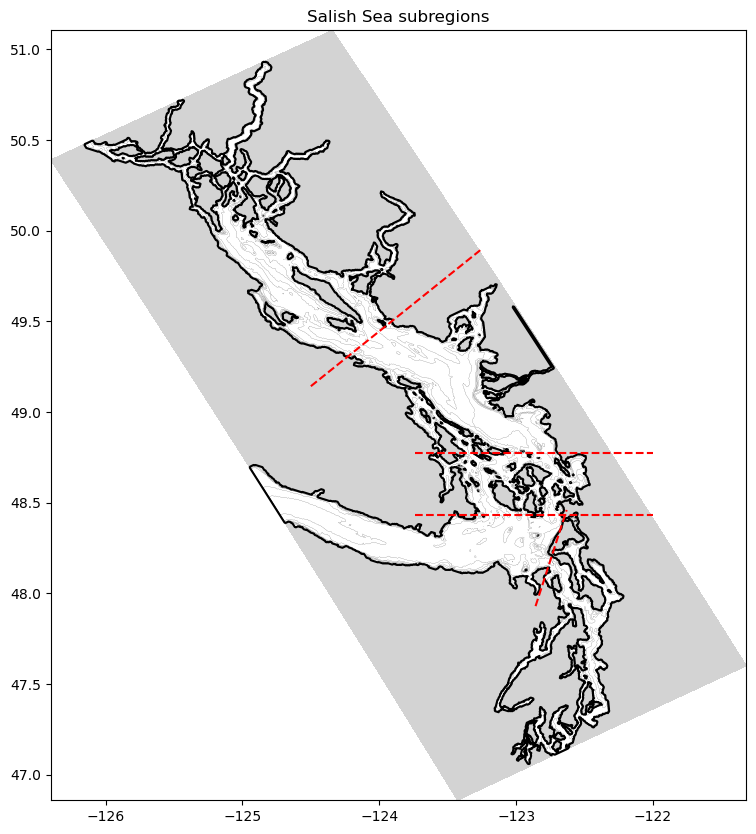

In [27]:
from matplotlib import pyplot as plt,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

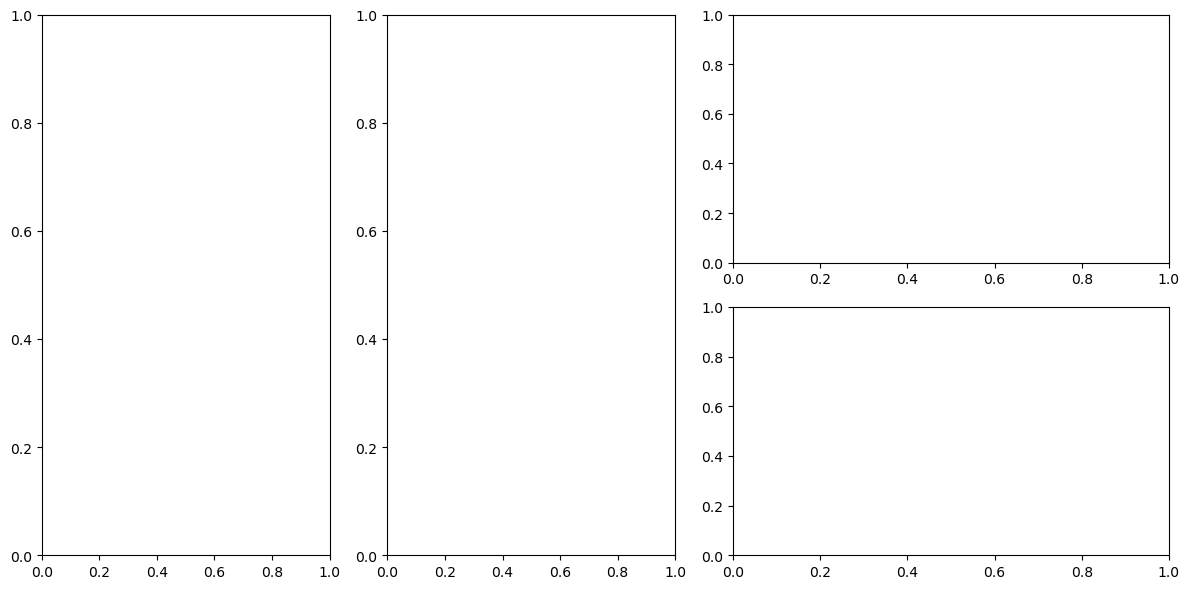

In [28]:
import matplotlib.gridspec as gridspec

# Create a figure and a GridSpec layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1], width_ratios=[0.66, 0.66, 1])

# Add the first two single large figures (one per column)
ax1 = fig.add_subplot(gs[:, 0])  # Occupies both rows in column 1
ax2 = fig.add_subplot(gs[:, 1])  # Occupies both rows in column 2

# Add the third column with two stacked subplots
ax3 = fig.add_subplot(gs[0, 2])  # Upper subplot in column 3
ax4 = fig.add_subplot(gs[1, 2])  # Lower subplot in column 3

# Adjust layout for better visualization
plt.tight_layout()
plt.show()
axes = fig.get_axes()


In [29]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [30]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',1],'Mar':['Run_Marzo20190301_.nc',1],'Jun':['Run_Junio20190601_.nc',1],'Jul':['Run_Julio20190701_.nc',1],'Aug':['Run_Agosto20190801_.nc',1]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [31]:
volume = (mask.e1t[0,:,:]*(mask.e2t[0,:,:])*(mask.e3t_0[0,:,:,:]))
maskt = mask.tmask[0,:,:,:]
total_volume = np.sum(maskt* volume)

In [32]:
concs = {'180 s':['alpha120190101.npy',2],'360 s':['alpha_1_jan.npy',2],'720 s':['alpha220190101.npy',2],'1,800 s':['Runs_alpha0220190101_.npy',1],'3,600 s':['Run_Enero20190101_.npy',1],'6,120 s':['Runs_alpha0520190101_.npy',1],'36,000 s':['Runs_alpha0120190101_.npy',1]}


#alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}
#alphs = {'180 s':0.05,'360 s':0.1,'720 s':0.2,'1,800 s':0.5,'3,600 s':1,'6,120 s':1.7,'36,000 s':10}
alphs = {'180 s':14.5,'360 s':7.23,'720 s':3.6,'1,800 s':1.4,'3,600 s':0.7,'6,120 s':0.4,'36,000 s':0.07}


xs =np.array(list(alphs.values()))
masktt=maskt[:,::3,::3]
conc_mean = []
weighted_nanmean =[]
weighted_q1 = []
weighted_q3 = []
conc_sd = []
weights = mask.e3t_0[0,:,::3,::3]
TD = np.nansum(np.where(masktt,weights,np.nan).ravel())
weights = np.where(masktt,weights,np.nan)/TD
for alp in alphs:
    conc = np.load(path_cons+concs[alp][0])/concs[alp][1]
    conc = np.where(masktt,conc,np.nan)
    masknan = ~np.isnan(conc)
    data_cleaned = conc[masknan]
    weights_cleaned = weights[masknan]
    weighted_mean=np.average(data_cleaned, weights=weights_cleaned)
    weighted_nanmean.append(weighted_mean)
    #conc_mean.append(np.nanmean(np.nanmean(np.nanmean(conc,axis=2),axis=1)))
    #conc_sd.append(np.nanstd(np.nanstd(np.nanstd(conc,axis=2),axis=1)))
#plt.plot(xs, weighted_nanmean, '.', label="data")
p0 = axes[3].plot(xs,weighted_nanmean,'.--',label = r'Concentration [MF m$^{-3}$]',markersize=10)
#axes[3].set_xscale('log')

In [33]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth.
    
    Parameters:
        lat1, lon1: Latitude and longitude of point 1 in decimal degrees.
        lat2, lon2: Latitude and longitude of point 2 in decimal degrees.
    
    Returns:
        Distance in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    r = 6371000 # Radius of Earth in kilometers
    return r * c

In [34]:
# travel_all = []
# for alpha in runs:
#     print(alpha)
#     ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
#     x = np.linspace(0,31,ds.dims['obs']-1)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
    
#     dist_travel = []
#     for i in range(len(DS.lat)):
#         try: leni = len(DS.lat[i])
#         except KeyError:
#             break
#         dist_travel.append(haversine(DS.lat[i][0],DS.lon[i][0],DS.lat[i][leni-1],DS.lon[i][leni-1]))
#     travel_all.append(dist_travel)
# np.save('distance_travelled.npy',np.array(travel_all))

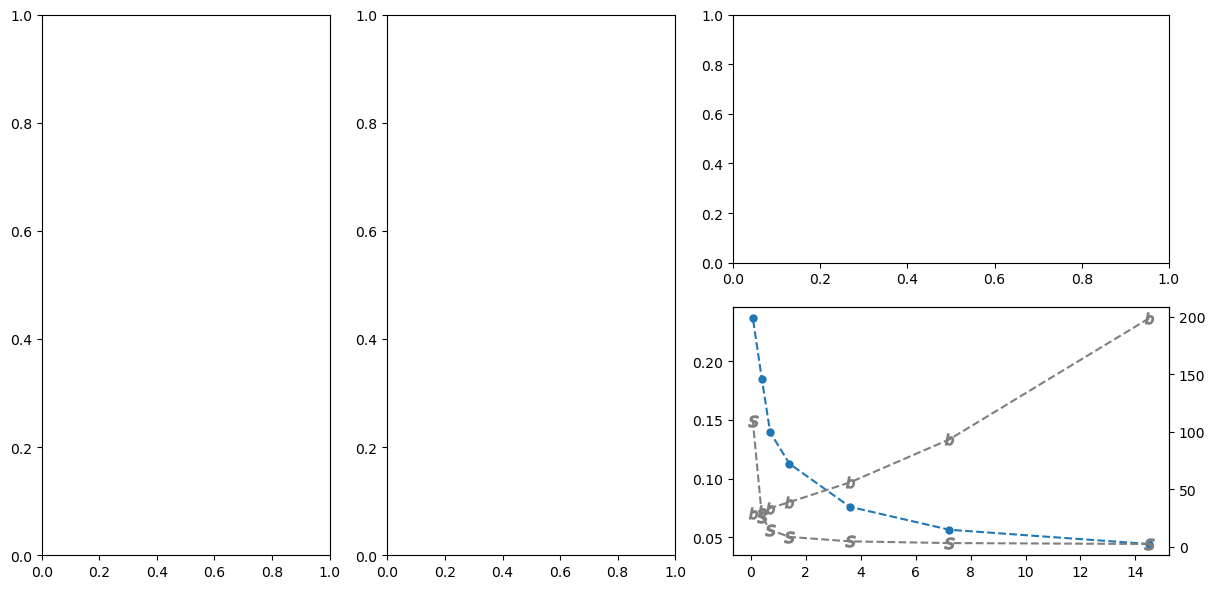

In [35]:
#np.save('sinkrates_alpha.npy',np.array(out))
axes4 = plt.twinx(axes[3])
out = np.load('sinkrates_alpha.npy')
beached = []
sedimented= []
for alpha in out:
    beached.append(alpha[0])
    sedimented.append(alpha[1])
p2 = axes4.plot(xs,np.array(beached),'--',c='tab:grey',label = r'Beaching rate [d$^{-1}$]',markersize=8,marker='$b$')
axes4.plot(xs,np.array(sedimented),'--',c='tab:grey',label = r'Sedimentation rate [d$^{-1}$]',markersize=8,marker = '$s$')

fig

In [36]:
alphs_old = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}

a=[]
sd=[]
for alpha in alphs_old:
    a.append(np.mean(np.load('distance_travelled'+str(alpha)+'.npy'))/1e3)
    sd.append(np.std(np.load('distance_travelled'+str(alpha)+'.npy'))/1e3)

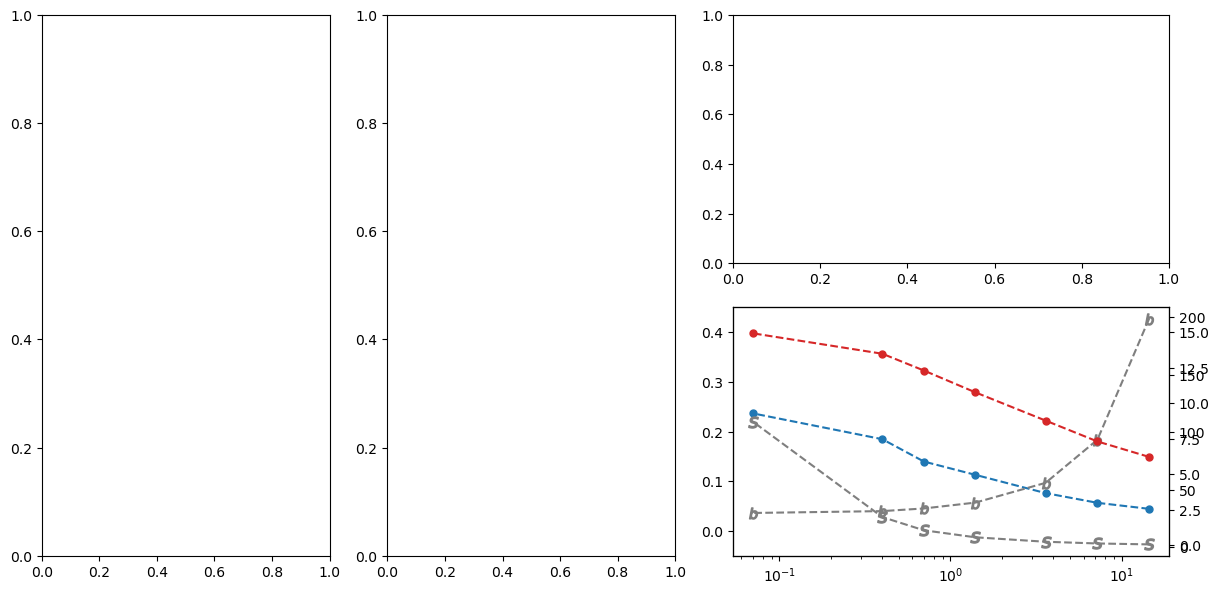

In [37]:
axes3 = plt.twinx(axes[3])
p1 = axes3.plot(xs,a,'.--',c='tab:red',label = r'Distance travelled [km]',markersize=10)
axes3.set_xscale('log')
handles0, labels0 = axes[3].get_legend_handles_labels()
handles, labels = axes3.get_legend_handles_labels()
handles1, labels1 = axes4.get_legend_handles_labels()
#axes[3].legend(handles=handles+handles0+handles1, labels=labels+labels0+handles1,loc=2)
axes[3].set_ylim(-0.05,0.45)
axes3.set_ylim(-0.75,16.75)
fig
#plt.errorbar(xs,a,yerr=sd)

In [38]:
maskbathy = np.where(masktt[0,:,:],mask.mbathy[0,::3,::3],np.nan)-1
maskbathy[np.isnan(maskbathy)]=0

In [39]:
#conc = np.load(path_runs+concs[alp][0])/concs[alp][1]

In [40]:
# concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

# months = {'Jan':['Run_Enero20190101_.npy',1],'Feb':['Run_Febrero20190201_.npy',1],'Mar':['Run_Marzo20190301_.npy',1],'Jun':['Run_Junio20190601_.npy',1],'Jul':['Run_Julio20190701_.npy',1],'Aug':['Run_Agosto20190801_.npy',1]}
# monthy = {'Jan':1,'Feb':2,'Mar':3,'Jun':6,'Jul':7,'Aug':8}


# conc_dep = []
# for alp in months:
#     conc = np.load(path_cons+months[alp][0])/months[alp][1]
#     conc = np.where(masktt,conc,np.nan)
#     for i in range(300):
#         for j in range(133):
#             conc[int(maskbathy[i,j]):,i,j]=np.nan
#     conc_dep.append(np.nanmean(np.nanmean(conc,axis=1),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
# X,Y =np.meshgrid(list(monthy.values()) ,mask.gdept_0[0,:,0,0])
# aa = axes[2].pcolormesh(X,Y,np.array(conc_dep).T,cmap=cmocean.cm.dense)
# levelsz =20+np.nanargmax(np.array(conc_dep)[:,20:],axis=1)
# zsub_max = []
# for zi in levelsz: 
#     zsub_max.append(mask.gdept_0[0,zi,0,0])
# sc= axes[2].scatter(np.array(list(monthy.values())),zsub_max,marker="*",c='r',label='Subsurface Max')

# axes[2].set_ylim(400,0)
# axes[2].set_xlim(3600/50050,3600/200)
# axes[2].legend(loc=3)
# fig

In [41]:
#concs = {'250 s':['alpha120190101.npy',2],'500 s':['alpha_1_jan.npy',2],'1,000 s':['alpha220190101.npy',2],'2,500 s':['Runs_alpha0220190101_.npy',1],'5,000 s':['Run_Enero20190101_.npy',1],'10,000 s':['Runs_alpha0520190101_.npy',1],'50,000 s':['Runs_alpha0120190101_.npy',1]}

conc_dep = []
for alp in alphs:
    conc = np.load(path_cons+concs[alp][0])/concs[alp][1]
    conc = np.where(masktt,conc,np.nan)
    for i in range(300):
        for j in range(133):
            conc[int(maskbathy[i,j]):,i,j]=np.nan
    conc_dep.append(np.nanmean(np.nanmean(conc,axis=1),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))
X,Y =np.meshgrid(list(alphs.values()) ,mask.gdept_0[0,:,0,0])
#aa = axes[2].contourf(X,Y,np.array(conc_dep).T,cmap=cm)
aa = axes[2].pcolormesh(X,Y,np.array(conc_dep).T,cmap=cmocean.cm.dense)
levelsz =20+np.nanargmax(np.array(conc_dep)[:,20:],axis=1)
zsub_max = []
for zi in levelsz: 
    zsub_max.append(mask.gdept_0[0,zi,0,0])
sc= axes[2].scatter(np.array(list(alphs.values())),zsub_max,marker="*",c='r',label='Subsurface Max')
#axes[2].scatter(np.array(list(alphs.values())),zsub_max2,marker="*",c='pink')
#axes[2].scatter(np.array(list(alphs.values())),zsub_max3,marker="*",c='g')
#plt.xticks(np.array(list(alphs.values())))
axes[2].set_ylim(400,0)
axes[2].set_xlim(5.4e-2,18)
axes[2].set_xscale("log")
axes[2].legend(loc=4)
#plt.title('effect of alpha average without last depth')

/tmp/ipykernel_2101170/1222854640.py:10: RuntimeWarning: Mean of empty slice
  conc_dep.append(np.nanmean(np.nanmean(conc,axis=1),axis=1))#np.nanmean(np.nanmean(conc,axis=2),axis=1))


In [42]:
alpha = '250 s'
alpha1 = '5,000 s'

ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
DS = ds.to_dataframe()
DS = DS.dropna()
DS = DS[DS.time>0]
DS = DS[DS.status==3]

ds1 = xr.open_dataset(path_runs+runs[alpha1][0], decode_times=False)
DS1 = ds1.to_dataframe()
DS1 = DS1.dropna()
DS1 = DS1[DS1.time>0]
DS1 = DS1[DS1.status==3]

In [43]:
# ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
# DS = ds.to_dataframe()
# DS = DS.dropna()
# DS = DS[DS.time>0] 


In [44]:
LON = np.array(DS.lon.unique())[::runs[alpha][1]]
LAT = np.array(DS.lat.unique())[::runs[alpha][1]]
LON1 = np.array(DS1.lon.unique())[::runs[alpha1][1]]
LAT1 = np.array(DS1.lat.unique())[::runs[alpha1][1]]

In [45]:
# run2 = {'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}
# for run in run2:
#     ds1 = xr.open_dataset(path_runs+runs[run][0], decode_times=False)
#     DS1 = ds1.to_dataframe()
#     DS1 = DS1.dropna()
#     DS1 = DS1[DS1.time>0]
#     DS1 = DS1[DS1.status==3]

#     LON1 = np.array(DS1.lon.unique())[::runs[run][1]]
#     LAT1 = np.array(DS1.lat.unique())[::runs[run][1]]

#     h, xedges0, yedges0, image = axes[1].hist2d(LON1,LAT1,[xedges, yedges],weights=concs[alpha][1]*(LON1/LON1)*5e6/(sarea*27.75),norm=colors.LogNorm())
#     H = ((h-h0)).T
#     print(run,len(H[H>0]))

In [46]:

# for run in runs:
#     ds1 = xr.open_dataset(path_runs+runs[run][0], decode_times=False)
#     DS1 = ds1.to_dataframe()
#     DS1 = DS1.dropna()
#     DS1 = DS1[DS1.time>0]
#     DS1 = DS1[DS1.status==3]

#     LON1 = np.array(DS1.lon.unique())[::runs[run][1]]
#     LAT1 = np.array(DS1.lat.unique())[::runs[run][1]]

#     h, xedges0, yedges0, image = axes[1].hist2d(LON1,LAT1,[xedges, yedges],weights=concs[alpha][1]*(LON1/LON1)*5e6/(sarea*27.75),norm=colors.LogNorm())
#     H = ((h-h0)).T
#     print(run,len(h[h>0]))

In [47]:
mt = np.array(mask.tmask[0,0,:,:])
SSCAREA = np.sum(mt.flatten())*440*500/1e6

In [48]:
import cmocean
cm = cmocean.cm.matter
N = 200
alpha = '3,600 s'
hn, xedges, yedges, image0 = axes[0].hist2d(LON,LAT,N,norm=colors.LogNorm())
axes[0].clear()
xlen = haversine(yedges[0], xedges[0], yedges[0], xedges[1])
ylen = haversine(yedges[0], xedges[0], yedges[1], xedges[0])

sarea = xlen*ylen
axes[0].contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
axes[0].contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
axes[0].contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

h0, xedgesn, yedgesn, image0 = axes[0].hist2d(LON,LAT,[xedges, yedges],weights=concs[alpha][1]*(LON/LON)*5e6/(sarea*27.75),cmap =cmocean.cm.thermal,norm=colors.LogNorm())

vmax = np.max(h0)
h, xedges0, yedges0, image = axes[1].hist2d(LON1,LAT1,[xedges, yedges],weights=concs[alpha][1]*(LON1/LON1)*5e6/(sarea*27.75),norm=colors.LogNorm())

In [91]:
for alphi in runs:
    ds = xr.open_dataset(path_runs+runs[alphi][0], decode_times=False)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    print(f'The average depth of sedimented particles for alpha run: {alphi} was {np.mean(DS.z.unique())}m with standard error {np.std(DS.z.unique())/len(DS.z.unique())}')

The average depth of sedimented particles for alpha run: 250 s was 83.77498769548322m with standard deviation 0.0003470134085935982
The average depth of sedimented particles for alpha run: 500 s was 86.87568345062552m with standard deviation 0.00037289248467506077
The average depth of sedimented particles for alpha run: 1,000 s was 91.32500143917402m with standard deviation 0.00042400172813068804
The average depth of sedimented particles for alpha run: 2,500 s was 98.41248153298046m with standard deviation 0.0011015491192384156
The average depth of sedimented particles for alpha run: 5,000 s was 104.4160044514177m with standard deviation 0.0007564360005773089
The average depth of sedimented particles for alpha run: 10,000 s was 109.18621926244568m with standard deviation 0.0022952065528735505
The average depth of sedimented particles for alpha run: 50,000 s was 119.64540241385647m with standard deviation 0.008032995560364568


In [49]:
meandepths = [79.72,81.96,85.04,89.86,93.73,96.46,101.30]

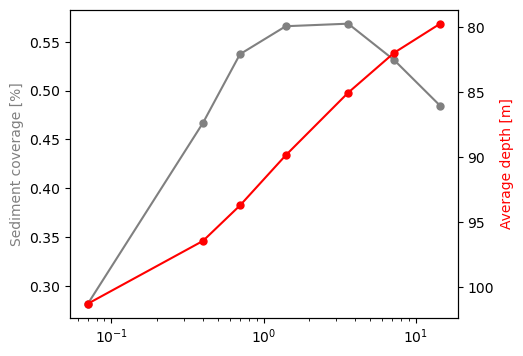

In [51]:
x = np.array(list(alphs.values()))
fig,axs = plt.subplots(1,1,figsize=(5,4))
plt.plot(x,np.array([3907,4284,4585,4564,4333,3766,2272])*sarea/(1e6*SSCAREA),'.-',markersize=10,color='grey',label= 'Sediment coverage')
axes_2 = plt.twinx(axs)
axs.yaxis.label.set_color('grey')
axes_2.yaxis.label.set_color('red')
axes_2.plot(x,meandepths,'.-',markersize=10,color='red',label= 'Average depth')
axs.set_ylabel(r'Sediment coverage [%]')
axes_2.set_ylabel(r'Average depth [m]')
axes_2.invert_yaxis()
plt.xscale("log")
#plt.title(r'$\lambda$ effect on Sedimentation')
plt.xlabel(r'$\lambda$ $[h^{-1}]$')
fig.savefig('cover_depths.pdf', bbox_inches='tight')

In [31]:
Xedges,Yedges = np.meshgrid(xedges,yedges)
ii_sed = np.zeros_like(Xedges)
jj_sed = np.zeros_like(Xedges)
for i in range(N):
    for j in range(N):
        jjj,iii = finder2(Yedges[i,j],Xedges[i,j])
        ii_sed[i,j]=iii
        jj_sed[i,j]=jjj

KeyboardInterrupt: 

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

x = np.linspace(0,397,398)
y = np.linspace(0,897,898)
X, Y =np.meshgrid(x,y)
axes[0].clear()
#image0 = axes[0].contourf(ii_sed[:-1,:-1],jj_sed[:-1,:-1], h0.T,norm=colors.LogNorm(),levels=np.logspace(-2,2,100),cmap = cmocean.cm.thermal,extend='both',vmin=1e-2,vmax=1e2)
image0 = axes[0].pcolormesh(ii_sed[:-1,:-1],jj_sed[:-1,:-1],h0.T,cmap=cmocean.cm.thermal,norm=colors.LogNorm(vmin=1e-2,vmax=1e2),snap = True)
image0.cmap.set_under('black')
#axes[0].contour(X,Y, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
axes[0].contourf(X,Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='#B1CBA6')
#axes[0].contour(X,Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',linewidths=0.1)
f = 1.14
axes[0].set_aspect(f)

axes[1].clear()
#image = axes[1].contourf(ii_sed[1:,1:],jj_sed[1:,1:], (100*(h-h0)/h0).T,levels=np.linspace(-100,100,101),cmap = 'coolwarm',extend='both')
#axes[1].contour(X,Y, mask.mbathy[0,:,:],colors='k',linewidths=0.1)

H = ((h-h0)).T
cmap_custom = mcolors.LinearSegmentedColormap.from_list(
    "CustomMap",
    [(0, cm.Blues(0.8)), (0.5, "white"), (1, cm.Reds(0.8))]
)
image=axes[1].pcolormesh(ii_sed[:-1,:-1],jj_sed[:-1,:-1],H ,cmap=cmap_custom,norm = mcolors.SymLogNorm(linthresh=1e-4, vmin=-100,vmax=100, base=10),
                       snap = True)
axes[1].contourf(X,Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='#B1CBA6')
axes[1].set_aspect(f)

/tmp/ipykernel_1655535/1982937028.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image0 = axes[0].pcolormesh(ii_sed[:-1,:-1],jj_sed[:-1,:-1],h0.T,cmap=cmocean.cm.thermal,norm=colors.LogNorm(vmin=1e-2,vmax=1e2),snap = True)
/tmp/ipykernel_1655535/1982937028.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  image=axes[1].pcolormesh(ii_sed[:-1,:-1],jj_sed[:-1,:-1],H ,cmap=cmap_custom,norm = mcolors.SymLogNorm(linthresh=1e-4, vmin=-100,vmax=100, base=10),


In [ ]:
cbar0 = plt.colorbar(image,ax=axes[1],pad=0.07,extend='both')
cbar0.set_label(r"Difference", fontsize=10)
cbar0.ax.yaxis.set_label_coords(0.25, 0.5)
# cbar0.set_ticks(np.arange(-100,101,25)) 
cbar1 =plt.colorbar(image0,ax=axes[0],pad=0.07,extend='max')#,orientation='horizontal')
cbar1.set_label(r"[MFm$^{-2}$d$^{-1}$]", fontsize=10)
cbar1.ax.yaxis.set_label_coords(0.15, 0.5)
cbar1.set_ticks(np.logspace(-2,2,5)) 
cbar2 = plt.colorbar(aa,ax=axes[2],pad=0.07,aspect=10)#,orientation='horizontal
cbar2.set_label(r"[MFm$^{-3}$]", fontsize=10)
cbar2.ax.yaxis.set_label_coords(0.06, 0.5)

/tmp/ipykernel_1655535/1742422868.py:1: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 7 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar0 = plt.colorbar(image,ax=axes[1],pad=0.07,extend='both')
/tmp/ipykernel_1655535/1742422868.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 8 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar1 =plt.colorbar(image0,ax=axes[0],pad=0.07,extend='max')#,orientation='horizontal')
/tmp/ipykernel_1655535/1742422868.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 9 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar2 = plt.colorbar(aa,ax=axes[2],pad=0.07,aspect=10)#,orientation='horizontal


<Figure size 640x480 with 0 Axes>

In [ ]:
letters = ['(a)', '(b)', '(c)', '(d)']

axes[0].text(0.84, 0.99, letters[0], transform=axes[0].transAxes, fontsize=12, fontweight='bold', va='top')
axes[1].text(0.84, 0.99, letters[1], transform=axes[1].transAxes, fontsize=12, fontweight='bold', va='top')
axes[2].text(0.93, 0.99, letters[2], transform=axes[2].transAxes, fontsize=12, fontweight='bold', va='top')
axes[3].text(0.92, 0.99, letters[3], transform=axes[3].transAxes, fontsize=12, fontweight='bold', va='top')

Text(0.92, 0.99, '(d)')

In [ ]:
from matplotlib.ticker import FormatStrFormatter
axes[3].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].set_title(r'Sedimentation for fast $\lambda$')
#axes[1].set_title(r'$\alpha$: 0.06 vs '+ str('{:3.2f}'.format(int(alpha1.split(' ')[0].replace(",", ""))/3600))+' h')
axes[1].set_title(r'$\lambda$: 0.7 - 14.5 h$^{-1}$')

axes[2].set_title(r'Impact on depth profile')
axes[3].set_title(r'Other impacts')
axes[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

axes[2].set_ylabel(r'Depth [m]')
axes[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(axis='y', which='both', left=False,  labelleft=False)
axes[0].tick_params(axis='y', which='both', left=False,  labelleft=False)

#axes[0].set_ylabel(r'y grid #')
#axes[0].set_xlabel(r'x grid #')
#axes[1].set_xlabel(r'x grid #')
axes[3].set_ylabel(r'Mean concentration [MF m$^{-3}$]')
axes[3].set_xlabel(r'$\lambda$ [h$^{-1}$]')
axes3.set_ylabel(r'Mean distance travelled [km]')
axes4.set_ylabel(r'Sink timescale [d]')
axes4.set_ylim([-5,220])
axes4.spines['right'].set_position(('outward', 35))

axes[3].yaxis.label.set_color(p0[0].get_color())
axes3.yaxis.label.set_color(p1[0].get_color())
axes4.yaxis.label.set_color(p2[0].get_color())

In [ ]:
fig.subplots_adjust(wspace=0.05, hspace=0.1)

#Here we squish the 4th pannel to have the same width as the rest
box = axes[3].get_position()
axes[3].set_position([box.x0+0.05, box.y0, box.width * 0.78, box.height])  # 

box = axes[2].get_position()
axes[2].set_position([box.x0+0.05, box.y0, box.width, box.height])  # 
box = cbar2.ax.get_position()
cbar2.ax.set_position([box.x0+0.05, box.y0, box.width, box.height])  # 

box = axes[1].get_position()
axes[1].set_position([box.x0-0.02, box.y0, box.width, box.height])  # 
box = cbar0.ax.get_position()
cbar0.ax.set_position([box.x0-0.02, box.y0, box.width, box.height])  # 


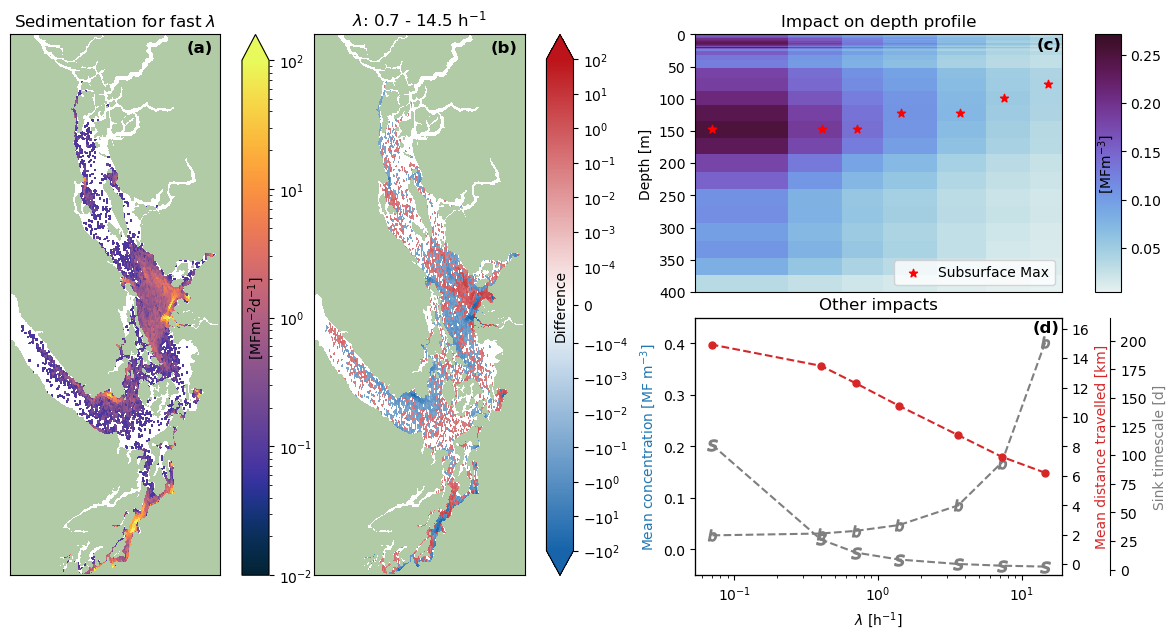

In [ ]:
fig

In [ ]:
fig.savefig('lambdafig_0.pdf', bbox_inches='tight')

In [ ]:
# def counting(DS,month,axs,fact=1,fact2 =1):
#     DSb = DS[DS.status==2]
#     DSe = DS[DS.status==3]
#     DSs = DS[DS.status==1]
#     count = []
#     countb = []
#     counte = []
#     depthb = []
#     for i in range(ds.dims['obs']-1):
#         times= np.min(DS.time)+i*6*3600
#         count.append(len(DSs[DSs.time == times]))
#         counte.append(len(DSe[DSe.time == times]))
#         countb.append(len(DSb[DSb.time == times]))
#         depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
#     axs[0,0].plot(x2,np.array(count)/fact,label = month)
#     axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
#     twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
#     axs[1,0].set_ylim([-1e4,6e4])
#     twin3.set_ylim([-1e4,6e4])
#     beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
#     sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
#     beached = np.array(beached)
#     for i,b in enumerate(beached):
#         if b==0:
#             beached[i]=(beached[i-1]+beached[i+1])/2
#     sediment = np.array(sediment)
#     for i,b in enumerate(sediment):
#         if b==0:
#             sediment[i]=(sediment[i-1]+sediment[i+1])/2
#     axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
#     # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
#     axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:]/fact2,10),label = 'Sedimentation rate')
#     return np.mean(1/beached[1:]),np.mean(1/sediment[1:]/fact2)

In [ ]:
# fig,axs = plt.subplots(2,2,figsize=(15,10))
# twin1 = axs[0,1].twinx()
# twin2 = axs[1,1].twinx()
# twin3 = axs[1,0].twinx()
# out = []
# #axs[1,1].plot(Time,np.array(Point_At.ssh[1:],dtype='f'),c='grey',alpha=0.4,label='SSH')
# for alpha in runs:
#     ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
#     x = np.linspace(0,30,ds.dims['obs']-1)
#     x2 = np.linspace(0,30,ds.dims['obs']-1)
#     DS = ds.to_dataframe()
#     DS = DS.dropna()
#     DS = DS[DS.time>0]
#     out.append(counting(DS,alpha,axs))
# axs[0,0].legend()
# legend_lines = [plt.Line2D([0], [0], color='black', linestyle='-'),
#                 plt.Line2D([0], [0], color='black', linestyle='--')]
# axs[1,0].legend(legend_lines,['Sedimented','Beached'], loc = 'upper left')
# axs[0,1].legend(legend_lines,['Bch Rate','Avg Depth'], loc = 'center right')